<a href="https://colab.research.google.com/github/Pallavih28/Gender_Image_Classification/blob/main/Gender_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gender Image Classification using Convolutional Neural Network**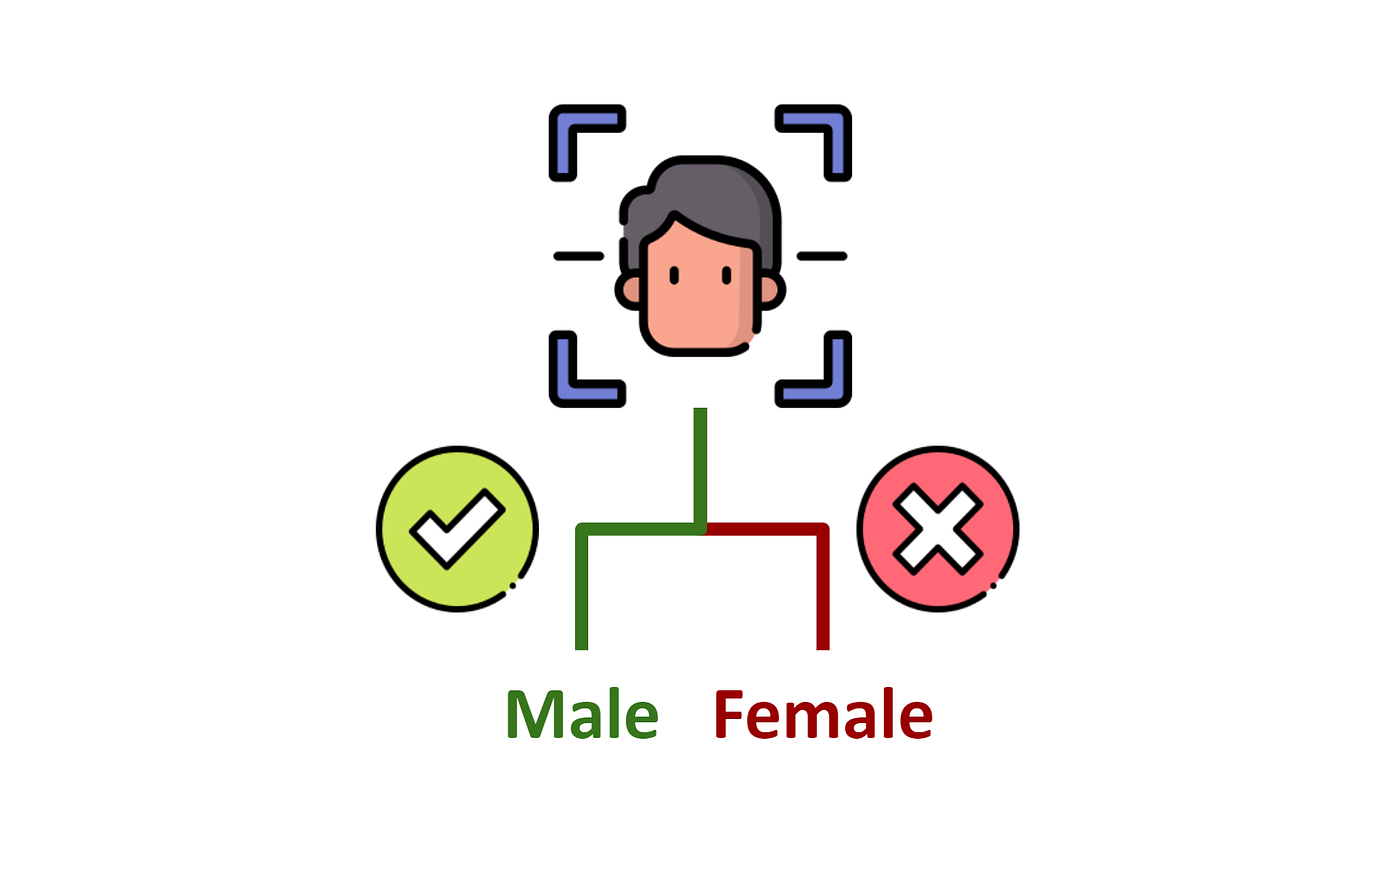





In [ ]:
import tensorflow as tf

In [ ]:
tf.test.gpu_device_name()

''

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imsave, imread, imshow
from glob import glob

In [ ]:
!unzip /content/drive/MyDrive/Gender_Classification_Problem/Images.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/5249.jpg         
  inflating: images/5250.jpg         
  inflating: images/5251.jpg         
  inflating: images/5252.jpg         
  inflating: images/5253.jpg         
  inflating: images/5254.jpg         
  inflating: images/5255.jpg         
  inflating: images/5256.jpg         
  inflating: images/5257.jpg         
  inflating: images/5258.jpg         
  inflating: images/5259.jpg         
  inflating: images/5260.jpg         
  inflating: images/5261.jpg         
  inflating: images/5262.jpg         
  inflating: images/5263.jpg         
  inflating: images/5264.jpg         
  inflating: images/5265.jpg         
  inflating: images/5266.jpg         
  inflating: images/5267.jpg         
  inflating: images/5268.jpg         
  inflating: images/5269.jpg         
  inflating: images/5270.jpg         
  inflating: images/5271.jpg         
  inflating: images/5272.jpg         
  inflating: images/5273.jpg         

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Gender_Classification_Problem/test_fkwGUNG.csv')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Gender_Classification_Problem/train.csv')

In [ ]:
train.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [ ]:
train['class'].value_counts()

1    6174
0    6022
Name: class, dtype: int64

In [ ]:
test_data.head()

,image_names
0,5603.jpg
1,1286.jpg
2,9815.jpg
3,8865.jpg
4,9306.jpg


In [ ]:
from keras.preprocessing import image
from keras.utils import load_img, img_to_array

images = []
for img in train.image_names:
    img = load_img('images/' + img, target_size=(100, 100, 3))
    img = img_to_array(img)
    images.append(img)

images=np.array(images)

In [ ]:
X = images/255
y = train['class']

In [ ]:
X.shape, y.shape

((12196, 100, 100, 3), (12196,))

In [ ]:
seed = 4
rng = np.random.RandomState(seed)

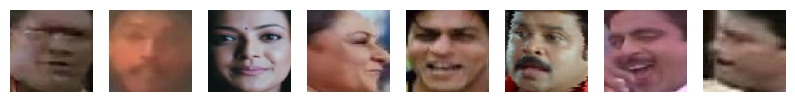

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=8,figsize=(10,12))
for i in range(8):
  ax[i].imshow(X[i])
  ax[i].axis('off')

In [ ]:
X.min(),X.max()

(0.0, 1.0)

2. Data Pre-processing

In [ ]:
## Converting RGB format to 1D array
#X = X.reshape(X.shape[0],100*100*3)

In [ ]:
X.shape

(12196, 100, 100, 3)

3. Train and Validation Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train,y_valid = train_test_split(X,y,random_state=seed,stratify=y,test_size=0.3)

In [ ]:
X_train.shape, X_valid.shape, y_train.shape,y_valid.shape

((8537, 100, 100, 3), (3659, 100, 100, 3), (8537,), (3659,))

4. Model Architect

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Dropout, BatchNormalization, Flatten, Conv2D
from keras.optimizers import Adam
from keras.initializers import random_normal, glorot_normal, he_normal

In [ ]:
model = Sequential()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer
from keras.initializers import he_normal
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator

# Define a Sequential model
model = Sequential()

# Input layer
model.add(InputLayer(input_shape=(100, 100, 3)))

# Convolutional layers
model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(units=500, activation='relu', kernel_initializer=he_normal(seed=seed)))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Adding dropout for regularization

model.add(Dense(units=300, activation='relu', kernel_initializer=he_normal(seed=seed)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=200, activation='relu', kernel_initializer=he_normal(seed=seed)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 25)        1900      
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 25)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 50)        31300     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 50)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 24200)             0         
                                                                 
 dense (Dense)               (None, 500)               1

In [ ]:
model.add(InputLayer(input_shape=(100,100,3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
# defining the second convolutional layer with 50 filters of size (5,5)
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))

model.add(Flatten())

model.add(Dense(units=500,activation='relu',kernel_initializer=he_normal(seed=seed)))
model.add(BatchNormalization())
model.add(Dense(units=300,activation='relu',kernel_initializer=he_normal(seed=seed)))
model.add(BatchNormalization())
model.add(Dense(units=200,activation='relu',kernel_initializer=he_normal(seed=seed)))
model.add(BatchNormalization())
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 25)        1900      
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 50)        31300     
                                                                 
 flatten (Flatten)           (None, 423200)            0         
                                                                 
 dense (Dense)               (None, 500)               211600500 
                                                                 
 batch_normalization (Batch  (None, 500)               2000      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                        

5. Compile the Model

In [ ]:
adam = Adam(lr=1e-5, clipvalue=1)

In [ ]:
### Complile the Model
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0.01,patience=25,mode='min')

6. Fit the Model

In [ ]:
### Fit the Model
model_history = model.fit(X,y,epochs=80,batch_size=150,validation_data=(X_valid,y_valid),callbacks=early_stopping)

Epoch 1/80
82/82 [==============================] - 5s 59ms/step - loss: 0.0272 - accuracy: 0.9897 - val_loss: 0.0092 - val_accuracy: 0.9978
Epoch 2/80
82/82 [==============================] - 4s 50ms/step - loss: 0.0287 - accuracy: 0.9902 - val_loss: 0.0147 - val_accuracy: 0.9954
Epoch 3/80
82/82 [==============================] - 4s 54ms/step - loss: 0.0258 - accuracy: 0.9908 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 4/80
82/82 [==============================] - 4s 49ms/step - loss: 0.0311 - accuracy: 0.9883 - val_loss: 0.0163 - val_accuracy: 0.9954
Epoch 5/80
82/82 [==============================] - 4s 47ms/step - loss: 0.0412 - accuracy: 0.9849 - val_loss: 0.0027 - val_accuracy: 0.9992
Epoch 6/80
82/82 [==============================] - 4s 50ms/step - loss: 0.0232 - accuracy: 0.9920 - val_loss: 0.0026 - val_accuracy: 0.9995
Epoch 7/80
82/82 [==============================] - 4s 55ms/step - loss: 0.0178 - accuracy: 0.9937 - val_loss: 0.0012 - val_accuracy: 0.9995
Epoch 8/80
82

In [ ]:
model.save('/content/drive/My Drive/my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('/content/drive/My Drive/my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from keras.preprocessing import image
from keras.utils import load_img, img_to_array

X_test = []
for img in test_data.image_names:
  img = load_img('images/'+ img,target_size=(100,100,3))
  img = img_to_array(img)
  X_test.append(img)
X_test=np.array(X_test)


In [ ]:
X_test = X_test/255

In [ ]:
from keras.models import load_model

# Load the trained model
model = load_model('/content/drive/My Drive/my_model.h5')

7. Evaluate Model

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
prediction = model.predict(X_valid)
prediction = prediction.reshape(y_valid.shape[0],)
# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype('int64')
# accuracy on validation set
print('Accuracy on validation set:', np.round(accuracy_score(y_valid, prediction_int),3), '%')

In [ ]:
train_prediction = model.predict(X_train)
train_prediction = train_prediction.reshape(y_train.shape[0],)
# converting probabilities to classes
train_prediction_int = train_prediction >= 0.5
train_prediction_int = train_prediction_int.astype('int64')
# accuracy on validation set
print('Accuracy on Training set:', np.round(accuracy_score(y_train, train_prediction_int),3), '%')

267/267 [==============================] - 2s 6ms/step
Accuracy on Training set: 0.997 %


Text(0, 0.5, 'accuracy')

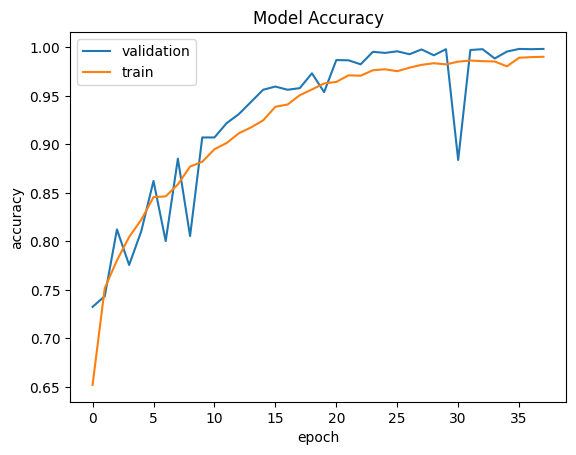

In [ ]:
plt.plot(model_history.history['val_accuracy'])
plt.plot(model_history.history['accuracy'])
plt.title('Model Accuracy')
plt.legend(['validation','train'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

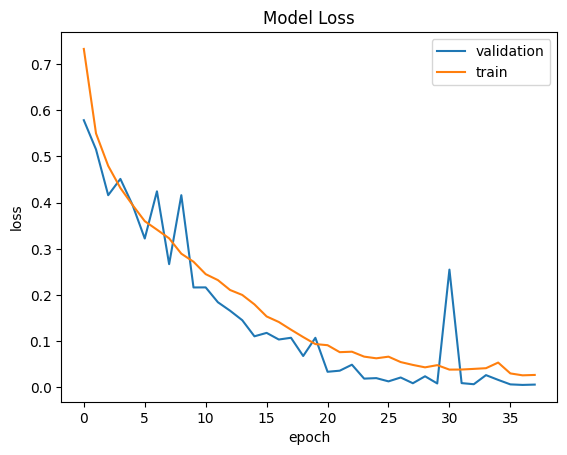

In [ ]:
plt.plot(model_history.history['val_loss'])
plt.plot(model_history.history['loss'])
plt.title('Model Loss')
plt.legend(['validation','train'])
plt.xlabel('epoch')
plt.ylabel('loss')

In the above case model is not overfitting yet so early stopping isn't right method of perfromance improvement. We can use methods to increase conversion speed of the model such as drop_out , BatchNormalization

In [ ]:
test_data.columns

In [ ]:
prediction = model.predict(X_test)

164/164 [==============================] - 2s 13ms/step


In [ ]:
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype('int64')

In [ ]:
a = prediction_int.tolist()
predictions_flat = [item for sublist in a for item in sublist]

In [ ]:
final_result = pd.DataFrame({'image_names':test_data.image_names,'class':predictions_flat})

In [ ]:
final_result.to_csv("submission.csv",index=False)

In [ ]:
pd.read_csv("submission.csv")

,image_names,class
0,5603.jpg,1
1,1286.jpg,1
2,9815.jpg,0
3,8865.jpg,1
4,9306.jpg,1
...,...,...
5222,13040.jpg,0
5223,1335.jpg,1
5224,11246.jpg,1
5225,9052.jpg,0


In [ ]:
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>